#TITANIC A data analysis on what kind of people survived the Titanic sinking. Children, ladies and upper class people were
given preference to the life boats, thereby their survival chances are higher. The machine learning tools are used to make such
an analysis on the data to predict if a person survived or not. The dataset contains: Name, PassengerId, Age, Sex, Class, Ticket
Number, Cabin, Number of children, parents and spouse, Port of entry, Ticket Price, Survived or not.The data is read from
file and stored in a Pandas Dataframe Object. There are 2 files: test and train in csv format. In train.csv, all the
data is given. It is used to find the relationship between all the attributes and the Survived attribute.
In test.csv, all the data except survived parameter is given. 
The relationship found from the train.csv file is applied to test.csv to predict the attribute Survived.


In [1]:
# Imports
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("G:/Data Science/train.csv")
test_df    = pd.read_csv("G:/Data Science/test.csv")
titanic_df2 = pd.read_csv("G:/Data Science/train.csv")
test_df2    = pd.read_csv("G:/Data Science/test.csv")
# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


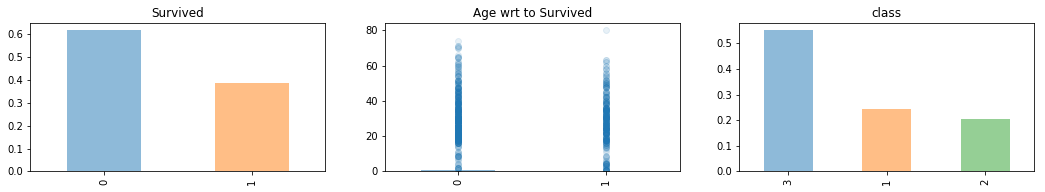

In [3]:
fig=plt.figure(figsize = [18,6])
plt.subplot2grid((2,3),(0,0))
titanic_df.Survived.value_counts(normalize='True').plot(kind='bar',alpha=0.5)
plt.title("Survived")

plt.subplot2grid((2,3),(0,1))
plt.scatter(titanic_df.Survived,titanic_df.Age,alpha=0.1)
titanic_df.Survived.value_counts(normalize='True').plot(kind='bar',alpha=0.5)
plt.title("Age wrt to Survived")

plt.subplot2grid((2,3),(0,2))
titanic_df.Pclass.value_counts(normalize='True').plot(kind='bar',alpha=0.5)
plt.title("class")


plt.show()

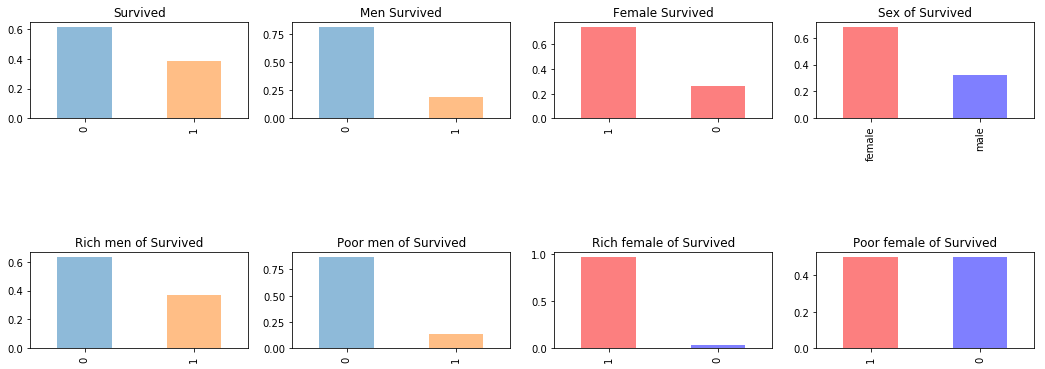

In [4]:
female_color="#FA0000"

fig=plt.figure(figsize = [18,6])
plt.subplot2grid((3,4),(0,0))
titanic_df.Survived.value_counts(normalize='True').plot(kind='bar',alpha=0.5)
plt.title("Survived")

plt.subplot2grid((3,4),(0,1))
titanic_df.Survived[titanic_df.Sex=='male'].value_counts(normalize='True').plot(kind='bar',alpha=0.5)
plt.title("Men Survived")

plt.subplot2grid((3,4),(0,2))
titanic_df.Survived[titanic_df.Sex=='female'].value_counts(normalize='True').plot(kind='bar',alpha=0.5,color =female_color)
plt.title("Female Survived")

plt.subplot2grid((3,4),(0,3))
titanic_df.Sex[titanic_df.Survived==1].value_counts(normalize='True').plot(kind='bar',alpha=0.5,color=[female_color,'b'])
plt.title("Sex of Survived")

#plt.subplot2grid((3,4),(1,0),colspan=4)
#for x in [1,2,3]:
#    titanic_df.Survived[titanic_df.Pclass==x].plot(kind = "kde")
#plt.title("class wrt Survived")
#plt.legend(("1st","2nd","3rd"))

plt.subplot2grid((3,4),(2,0))
titanic_df.Survived[(titanic_df.Sex =="male") & (titanic_df.Pclass == 1)].value_counts(normalize='True').plot(kind='bar',alpha=0.5)
plt.title("Rich men of Survived")


plt.subplot2grid((3,4),(2,1))
titanic_df.Survived[(titanic_df.Sex =="male") & (titanic_df.Pclass == 3)].value_counts(normalize='True').plot(kind='bar',alpha=0.5)
plt.title("Poor men of Survived")

plt.subplot2grid((3,4),(2,2))
titanic_df.Survived[(titanic_df.Sex =="female") & (titanic_df.Pclass == 1)].value_counts(normalize='True').plot(kind='bar',alpha=0.5,color=[female_color,'b'])
plt.title("Rich female of Survived")


plt.subplot2grid((3,4),(2,3))
titanic_df.Survived[(titanic_df.Sex =="female") & (titanic_df.Pclass == 3)].value_counts(normalize='True').plot(kind='bar',alpha=0.5,color=[female_color,'b'])
plt.title("Poor female of Survived")

plt.show()

In [5]:
titanic_df2.count()
#test_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:

titanic_df= titanic_df.drop(['PassengerId','Name','Ticket'],axis=1)

In [7]:
test_df    = test_df.drop(['Name','Ticket'], axis=1)

In [8]:
test_df.count()

PassengerId    418
Pclass         418
Sex            418
Age            332
SibSp          418
Parch          418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [9]:
# Fare

# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

In [10]:
#Age
average_age_titanic=titanic_df['Age'].mean()
std_age_titanic=titanic_df['Age'].std()
count_nan_age_titanic=titanic_df['Age'].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test=test_df['Age'].isnull().sum()

print(count_nan_age_titanic)
print(count_nan_age_test)

177
86


In [11]:
# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

In [12]:
# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

In [14]:
titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

In [15]:
titanic_df['Age'].isnull().sum()

0

In [16]:
titanic_df.loc[titanic_df["Sex"] == "male", "Sex"] = 0
titanic_df.loc[titanic_df["Sex"] == "female", "Sex"] = 1

In [17]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22,1,0,7
1,1,1,1,38,1,0,71
2,1,3,1,26,0,0,7
3,1,1,1,35,1,0,53
4,0,3,0,35,0,0,8


In [18]:
test_df.loc[test_df["Sex"] == "male", "Sex"] = 0
test_df.loc[test_df["Sex"] == "female", "Sex"] = 1


In [19]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34,0,0,7
1,893,3,1,47,1,0,7
2,894,2,0,62,0,0,9
3,895,3,0,27,0,0,8
4,896,3,1,22,1,1,12


In [20]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22,1,0,7
1,1,1,1,38,1,0,71
2,1,3,1,26,0,0,7
3,1,1,1,35,1,0,53
4,0,3,0,35,0,0,8


In [21]:
# define training and testing sets

X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [22]:
print(X_train)
features=['Pclass','Sex',  'Age',  'SibSp', 'Parch',  'Fare']

     Pclass  Sex  Age  SibSp  Parch  Fare
0         3    0   22      1      0     7
1         1    1   38      1      0    71
2         3    1   26      0      0     7
3         1    1   35      1      0    53
4         3    0   35      0      0     8
5         3    0   42      0      0     8
6         1    0   54      0      0    51
7         3    0    2      3      1    21
8         3    1   27      0      2    11
9         2    1   14      1      0    30
10        3    1    4      1      1    16
11        1    1   58      0      0    26
12        3    0   20      0      0     8
13        3    0   39      1      5    31
14        3    1   14      0      0     7
15        2    1   55      0      0    16
16        3    0    2      4      1    29
17        2    0   31      0      0    13
18        3    1   31      1      0    18
19        3    1   39      0      0     7
20        2    0   35      0      0    26
21        2    0   34      0      0    13
22        3    1   15      0      

In [23]:
print(X_test)

     Pclass  Sex  Age  SibSp  Parch  Fare
0         3    0   34      0      0     7
1         3    1   47      1      0     7
2         2    0   62      0      0     9
3         3    0   27      0      0     8
4         3    1   22      1      1    12
5         3    0   14      0      0     9
6         3    1   30      0      0     7
7         2    0   26      1      1    29
8         3    1   18      0      0     7
9         3    0   21      2      0    24
10        3    0   22      0      0     7
11        1    0   46      0      0    26
12        1    1   23      1      0    82
13        2    0   63      1      0    26
14        1    1   47      1      0    61
15        2    1   24      1      0    27
16        2    0   35      0      0    12
17        3    0   21      0      0     7
18        3    1   27      1      0     7
19        3    1   45      0      0     7
20        1    0   55      1      0    59
21        3    0    9      0      1     3
22        1    1   42      0      

In [24]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.797979797979798

In [25]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
decision_tree = DecisionTreeClassifier(min_samples_split=100,random_state = 1)
decision_tree.fit(X_train,Y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree.score(X_train, Y_train)

0.8237934904601572

In [26]:
import io
import pydotplus
from scipy import misc
from matplotlib import pyplot as plt
def show_tree(tree,features,path):
    f=io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams['figure.figsize']=(20,20)
    plt.imshow(img)

In [28]:
show_tree(decision_tree,features,'dec_tree_01.png')

InvocationException: GraphViz's executables not found

In [29]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('G:/Data Science/titanic_dec.csv', index=False)

In [30]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9584736251402918

In [31]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('G:/Data Science/titanic.csv', index=False)